# Kontsevich's strange function

Kontsevich's strange function is defined as
$$
F(q) = \sum_{n \ge 0} (q;q)_n = \sum_{n \ge 1} (1 - q)(1 - q^2) \cdots (1 - q^n)
$$
which only makes sense when $q$ is a root of unity. Zagier proved that the function $\varphi(x) := q^{1/24}F(q)$ for $q = e^{2 \pi i x}$ becomes a weight $3/2$, level $\mathrm{SL}_{2}(\mathbb{Z})$ quantum modular form; the error functions
$$
\begin{align*}
\varphi(x) - \zeta_{24}^{-1} \varphi(x + 1) &= 0 \\
\varphi(x) - \zeta_{8}^{\mathrm{sgn}(x)} |x|^{-3/2} \varphi\left(-\frac{1}{x}\right) &= g(x)
\end{align*}
$$
are smooth and real-analytic except at $x = 0$. (Note that some typos in the Zagier's paper are fixed here.)

In [1]:
from quantum_modform import *

UCF = UniversalCyclotomicField()
E = UCF.gen

In [2]:
def F(x):
    a, b = x.denom(), x.numer()
    q = E(a, b)
    r = UCF(0)
    for n in range(0, a + 1):
        r += poch(q, q, n)
    return r

def phi(x):
    a, b = x.denom(), x.numer()
    return E(24 * a, b) * F(x)

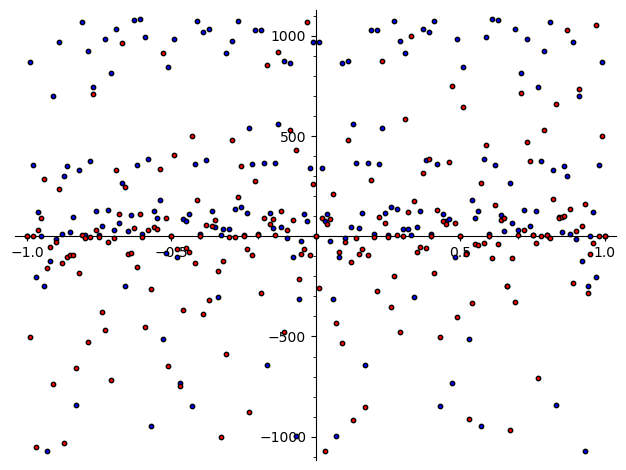

In [3]:
plot_func(phi, 100, "both")

In [4]:
# Error functions
def phi_T(x):
    # This is identically zero
    return phi(x) - E(24, -1) * phi(x + 1)

def phi_S(x):
    # g(x)
    return phi(x) - E(8, 1)^(x.sign()) * abs(x)^(-3/2) * phi(-1/x)

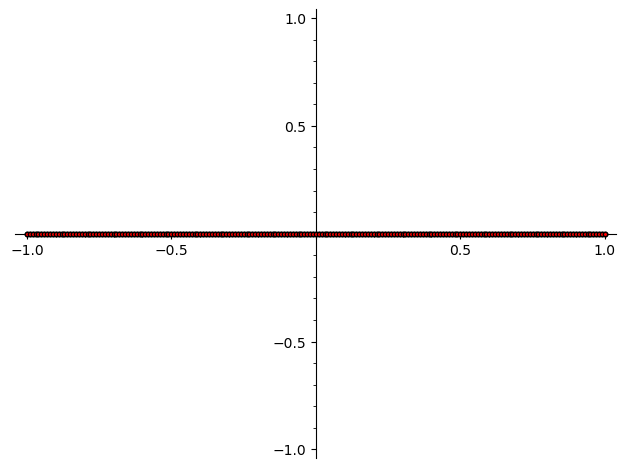

In [5]:
plot_func(phi_T, 100, "both")

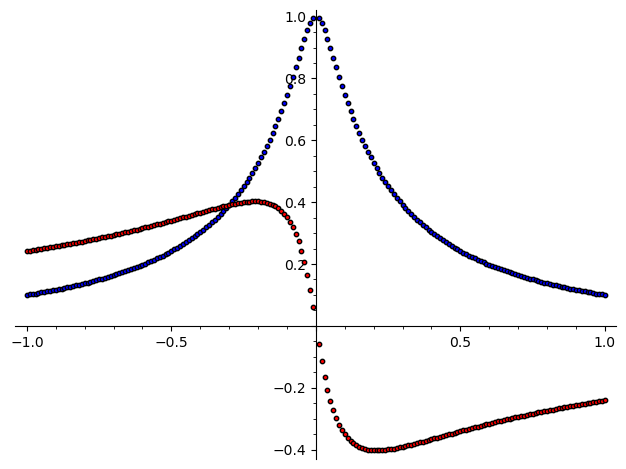

In [6]:
plot_func(phi_S, 100, "both", [0])